# Project Details :

### Sentiment analysis using python and parsing the tweets related to neeraj chopra

In [4]:
#Importing required libraries

In [5]:
!pip install tweepy

In [7]:
!pip install textblob

In [9]:
!pip install wordcloud

In [1]:
import tweepy as tp 
from textblob import TextBlob as tb
from wordcloud import WordCloud as wc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [11]:
# TWITTER Credentials
# API or consumer Key - JRRGu3s1z5V5yLkLZTxJEU6xG
# API or consumer Secret Key - miJmtwQvbXm2vc5cEg1kfPdjsMnkZJCLUhFvHCkXWt3KT9y0qR
# Bearer Token - AAAAAAAAAAAAAAAAAAAAAA1MSgEAAAAAB4pfii8XPo7X0SRD7KHcnqt4qfA%3DbTPjrRuujn9dbyQE51wW24fBh4Z5hnSHM5dyh08GemmzUqUtB5
# Access Token - 1425353779356991489-sIzOxHte9yG2zIAzRShl8IZ7YZVNmr
# Access Token Secret - d3XdGHZVyaO2l26cQNzzNeNJYJXALstmudpnrAJ3egLG6

In [2]:
# Creating a authentication object
auth = tp.OAuthHandler('JRRGu3s1z5V5yLkLZTxJEU6xG','miJmtwQvbXm2vc5cEg1kfPdjsMnkZJCLUhFvHCkXWt3KT9y0qR')

# Set the access token and access token secret
auth.set_access_token('1425353779356991489-sIzOxHte9yG2zIAzRShl8IZ7YZVNmr','d3XdGHZVyaO2l26cQNzzNeNJYJXALstmudpnrAJ3egLG6')

# Create an API object by passing in the auth information
api = tp.API(auth,wait_on_rate_limit=True)

In [61]:
# Extract 100 tweets from the user 
posts = api.user_timeline(screen_name= "Neeraj_chopra1", count= 100, lang = 'en', tweet_mode="extended")
posts

[Status(_api=<tweepy.api.API object at 0x0000018577020DF0>, _json={'created_at': 'Sun Aug 08 09:10:57 +0000 2021', 'id': 1424297067166408705, 'id_str': '1424297067166408705', 'full_text': 'Still processing this feeling. To all of India and beyond, thank you so much for your support and blessings that have helped me reach this stage. \nThis moment will live with me forever 🙏🏽🇮🇳 https://t.co/BawhZTk9Kk', 'truncated': False, 'display_text_range': [0, 189], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1424296886379323395, 'id_str': '1424296886379323395', 'indices': [190, 213], 'media_url': 'http://pbs.twimg.com/media/E8QeeM9VoAMMmNk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/E8QeeM9VoAMMmNk.jpg', 'url': 'https://t.co/BawhZTk9Kk', 'display_url': 'pic.twitter.com/BawhZTk9Kk', 'expanded_url': 'https://twitter.com/Neeraj_chopra1/status/1424297067166408705/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1200, 'h': 799, 'resize': '

In [62]:
# let's see the recent 5 tweets from this account
for i in range(5):
    print(str(i+1)+"."+" "+posts[i].full_text)

1. Still processing this feeling. To all of India and beyond, thank you so much for your support and blessings that have helped me reach this stage. 
This moment will live with me forever 🙏🏽🇮🇳 https://t.co/BawhZTk9Kk
2. Heading ✈️ to my first olympic games@tokyo2020 
With bag full of excitement.
Its time to give it all💪 
India keep supporting 🇮🇳 
#TeamNeeraj#afi#sai#jsw # Tops https://t.co/mjuAJEuuZu
3. While I am not in Tokyo yet, I wish all the #TeamIndia athletes the very best for @Tokyo2020  
To everyone supporting us: thank you for your wishes and please keep cheering every Indian athlete in Tokyo 🙏
#CheerForIndia
4. Thank you 🙏😊 https://t.co/hOqsLJlH0a
5. Felt so good to read about Kashmiri Uncle, Naseem sir and all the others in Panchkula who ensured me and other athletes in the stadium stayed fit and healthy! They played a huge part in shaping me into the athlete I am today 🙏🏽 https://t.co/O5Gb74zvfh


In [63]:
# Creating a data frame containing all the tweets for analysis of the tweets

# First we will create a numpy array containing all the tweets

ar = [tw.full_text for tw in posts ]
 
# We will append the tweets in a data frame
 
df = pd.DataFrame(ar,columns = ["Tweets"])

# Displaying the first 10 rows of the data frame

df.head(10)

,Tweets
0,Still processing this feeling. To all of India...
1,Heading ✈️ to my first olympic games@tokyo2020...
2,"While I am not in Tokyo yet, I wish all the #T..."
3,Thank you 🙏😊 https://t.co/hOqsLJlH0a
4,"Felt so good to read about Kashmiri Uncle, Nas..."
5,"RT @spikesmag: ""I see so much potential for In..."
6,🙏😊🇮🇳💪 https://t.co/8mCrm7zRF7
7,@TejaswinShankar @jswsports M just feeling luc...
8,https://t.co/mWDnu8MDIj
9,"My fellow athletes and I, along with @mobil_in..."


### Cleaning the data

In [64]:
# Creating a function for cleaning the tweets as tweets contains various url,hashtags and tags of other accounts we need clean all such texts from tweets
# For cleaning the tweets we use python library = 're'
def cleanTweets(tweet):
    tweet = re.sub(r"Neeraj_chopra1","",tweet) #To remove the specific mention as it contains underscore
    tweet = re.sub(r"#", "", tweet) # To remove the '#' symbol from the tweets
    tweet = re.sub(r"RT[\s]+","",tweet) # To remove RT from thr tweets
    tweet = re.sub(r"@[A-Za-z0-9]+","",tweet) # To remove the tags of other accounts
    tweet = re.sub(r"https?:\/\/\S+","",tweet) # To remove the urls from the tweetsda
    tweet = tweet.encode("ascii","ignore").decode("ascii") #To remove anything outside ascii characters (Here:emojis)
    
    return tweet

In [65]:
#    Applying the function to the data frame

df["Tweets"] = df["Tweets"].apply(cleanTweets)

df.Tweets[1]

'Heading  to my first olympic games \nWith bag full of excitement.\nIts time to give it all \nIndia keep supporting  \nTeamNeerajafisaijsw  Tops '

In [66]:
# So as the tweets are free from urls,emojis,hashtags etc.

# Now we would create the columns containing subjectivity and polarity of the tweets

def Tweetsubjectivity(tweet):
    return tb(tweet).sentiment.subjectivity

def Tweetpolarity(tweet):
    return tb(tweet).sentiment.polarity

# Adding the new columns in the data frame
 
df["Subjectivity"] = df["Tweets"].apply(Tweetsubjectivity)

df["Polarity"] = df["Tweets"].apply(Tweetpolarity)

# New Data frame

df

,Tweets,Subjectivity,Polarity
0,Still processing this feeling. To all of India...,0.350000,0.168182
1,Heading to my first olympic games \nWith bag ...,0.377778,0.283333
2,"While I am not in Tokyo yet, I wish all the Te...",0.320000,0.625000
3,Thank you,0.000000,0.000000
4,"Felt so good to read about Kashmiri Uncle, Nas...",0.555000,0.400000
...,...,...,...
95,": This performance is giving me hope, Olympic-...",0.000000,0.000000
96,: N.C. Sher of Indian Olympics has arrived \n\...,1.000000,1.000000
97,: .@ is eager to make up for lost time after m...,0.950000,0.750000
98,: Tokyo2020 neerajchopra\n\n book Jeet Aapki a...,0.000000,0.000000


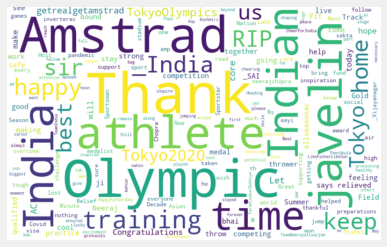

In [67]:
# Plotting the word cloud 

Words = " ".join(tweets for tweets in df["Tweets"])

word_cl = wc(height = 500, width = 800, max_font_size = 120,background_color = "white").generate(Words)

plt.imshow(word_cl,interpolation = "bilinear")

plt.axis("off")

plt.show()

In [68]:
# Creating a function to tell wheather the tweet is neutral,positive,negative

def Tweet_analysis(polarity):
    
    if polarity>0:
        return "Positive"
    elif polarity==0:
        return "Neutral"
    else:
        return "Negative"

# Adding type of each tweet 

df["Polarity analysis"] = df["Polarity"].apply(Tweet_analysis)

df

,Tweets,Subjectivity,Polarity,Polarity analysis
0,Still processing this feeling. To all of India...,0.350000,0.168182,Positive
1,Heading to my first olympic games \nWith bag ...,0.377778,0.283333,Positive
2,"While I am not in Tokyo yet, I wish all the Te...",0.320000,0.625000,Positive
3,Thank you,0.000000,0.000000,Neutral
4,"Felt so good to read about Kashmiri Uncle, Nas...",0.555000,0.400000,Positive
...,...,...,...,...
95,": This performance is giving me hope, Olympic-...",0.000000,0.000000,Neutral
96,: N.C. Sher of Indian Olympics has arrived \n\...,1.000000,1.000000,Positive
97,: .@ is eager to make up for lost time after m...,0.950000,0.750000,Positive
98,: Tokyo2020 neerajchopra\n\n book Jeet Aapki a...,0.000000,0.000000,Neutral


In [69]:
# Sorting the tweets in the data frame based on their polarity to make analysis easy

df = df.sort_values(by = ["Polarity"])
df.reset_index(drop=True,inplace=True)
df

,Tweets,Subjectivity,Polarity,Polarity analysis
0,"Summer, Winter or Rain; nothing should come in...",0.925,-0.175,Negative
1,: neerajchopra Tokyo2020\n\nJavelin thrower @ ...,0.000,0.000,Neutral
2,,0.000,0.000,Neutral
3,,0.000,0.000,Neutral
4,Thank you ji,0.000,0.000,Neutral
...,...,...,...,...
95,Stay happy,1.000,0.800,Positive
96,Proud of you bhai keep going,1.000,0.800,Positive
97,_Odisha: Happy to see @ practice at KalingaSta...,0.650,0.900,Positive
98,: N.C. Sher of Indian Olympics has arrived \n\...,1.000,1.000,Positive


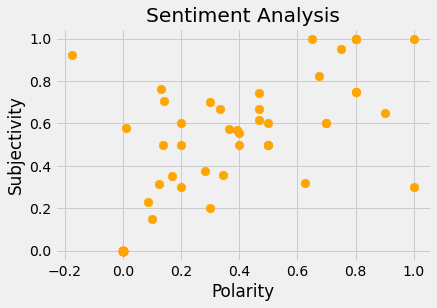

In [70]:
# Visualisation of the sentiment using scatter graph

plt.scatter(df["Polarity"],df["Subjectivity"],color="orange",s = 75)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis")
plt.show()

## So Here most of the tweets seems to be positive

In [71]:
# Printing all of the negative tweets

for i in range(len(df["Polarity analysis"])):
    if df["Polarity analysis"][i]=="Negative":
        print(str(i+1)+"."+" "+df["Tweets"][i].strip())
        

1. Summer, Winter or Rain; nothing should come in between your Aim. Just like _India All Season Hot &amp; Cold AC. AllSeasonAC InverterAC GetRealGetAmstrad AimForGold


## So this our Twitter Sentiment Analysis for Neeraj Chopra. 
- Only 1% tweets are negative